# Stagg examples

The main purpose of Stagg is to move **st**atistical **agg**reggations, such as histograms, from one framework to the next. This requires a conversion of high-level domain concepts.

Consider the following example: in Numpy, a histogram is simply a 2-tuple of arrays with special meaning—bin contents, then bin edges.

In [1]:
import numpy

numpy_hist = numpy.histogram(numpy.random.normal(0, 1, int(10e6)), bins=80, range=(-5, 5))
numpy_hist

(array([     4,      4,      5,     10,     25,     47,     69,    142,
           198,    358,    535,    884,   1339,   2102,   3131,   4539,
          6704,   9689,  13543,  18819,  25200,  34266,  45614,  59461,
         76239,  97011, 120059, 147304, 177893, 211161, 246694, 283410,
        321917, 358283, 394033, 425675, 452516, 473437, 489853, 495843,
        497469, 487856, 475053, 453266, 425474, 394644, 358513, 321261,
        285087, 246545, 211098, 177485, 147722, 120307,  96520,  76635,
         59600,  45662,  34136,  25607,  18706,  13459,   9625,   6767,
          4569,   3091,   2046,   1417,    905,    564,    376,    229,
           120,     74,     40,     24,     12,      3,     10,      1]),
 array([-5.   , -4.875, -4.75 , -4.625, -4.5  , -4.375, -4.25 , -4.125,
        -4.   , -3.875, -3.75 , -3.625, -3.5  , -3.375, -3.25 , -3.125,
        -3.   , -2.875, -2.75 , -2.625, -2.5  , -2.375, -2.25 , -2.125,
        -2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 

We convert that into its Stagg equivalent with a connector (two-function module: `tostagg` and `tonumpy`).

In [2]:
import stagg.connect.numpy

stagg_hist = stagg.connect.numpy.tostagg(numpy_hist)
stagg_hist

This object is instantiated from a class structure built from simple pieces.

In [3]:
stagg_hist.dump()

Histogram(
  axis=[
    Axis(binning=RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0)))
  ],
  counts=
    UnweightedCounts(
      counts=
        InterpretedInlineInt64Buffer(
          buffer=
              [     4      4      5     10     25     47     69    142    198    358
                  535    884   1339   2102   3131   4539   6704   9689  13543  18819
                25200  34266  45614  59461  76239  97011 120059 147304 177893 211161
               246694 283410 321917 358283 394033 425675 452516 473437 489853 495843
               497469 487856 475053 453266 425474 394644 358513 321261 285087 246545
               211098 177485 147722 120307  96520  76635  59600  45662  34136  25607
                18706  13459   9625   6767   4569   3091   2046   1417    905    564
                  376    229    120     74     40     24     12      3     10      1])))


Now it can be converted to a ROOT histogram with another connector.

In [4]:
import stagg.connect.root

root_hist = stagg.connect.root.toroot(stagg_hist, "root_hist")
root_hist

Welcome to JupyROOT 6.14/04


<ROOT.TH1D object ("root_hist") at 0x562f33ec4a40>

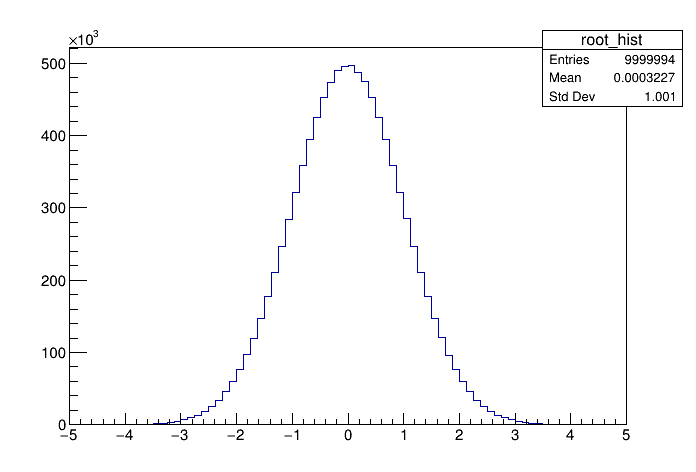

In [5]:
import ROOT
canvas = ROOT.TCanvas()
root_hist.Draw()
canvas.Draw()

And Pandas with yet another connector.

In [6]:
import stagg.connect.pandas

pandas_hist = stagg.connect.pandas.topandas(stagg_hist)
pandas_hist

,unweighted
"[-5.0, -4.875)",4
"[-4.875, -4.75)",4
"[-4.75, -4.625)",5
"[-4.625, -4.5)",10
"[-4.5, -4.375)",25
"[-4.375, -4.25)",47
"[-4.25, -4.125)",69
"[-4.125, -4.0)",142
"[-4.0, -3.875)",198
"[-3.875, -3.75)",358


The `stagg_hist` object is also a [Flatbuffers](http://google.github.io/flatbuffers/) object, which has a [multi-lingual](https://google.github.io/flatbuffers/flatbuffers_support.html), [random-access](https://github.com/mzaks/FlatBuffersSwift/wiki/FlatBuffers-Explained), [small-footprint](http://google.github.io/flatbuffers/md__benchmarks.html) serialization:

In [8]:
stagg_hist.tobuffer()

bytearray(b'\x04\x00\x00\x00\x90\xff\xff\xff\x10\x00\x00\x00\x00\x01\n\x00\x10\x00\x0c\x00\x0b\x00\x04\x00\n\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x01\x04\x00\x00\x00\x01\x00\x00\x00\x0c\x00\x00\x00\x08\x00\x0c\x00\x0b\x00\x04\x00\x08\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x02\x08\x00(\x00\x1c\x00\x04\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\xc0\x00\x00\x00\x00\x00\x00\x14@\x01\x00\x00\x00\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\n\x00\t\x00\x04\x00\x08\x00\x00\x00\x0c\x00\x00\x00\x00\x02\x06\x00\x08\x00\x04\x00\x06\x00\x00\x00\x04\x00\x00\x00\x80\x02\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x19\x00\x00\x00\x00\x00\x00\x00/\x00\x00\x00\x00\x00\x00\x00E\x00\x00\x00\x00\x00\x00\x00\x8e\x00\x00\x00\x00\x00\x00\x00\xc6\x00\x00\x00\x00\x00\x00\x00f\x01\x00\x00\x00\x00\x00\x00\x17\x02\x00\x00\x00\x00\x00\x00t\x03\x00\x00\x00\x00\x00\x00;\x05\x00\x00\x00\x00\x00\x006

In [15]:
print("Numpy size: ", numpy_hist[0].nbytes + numpy_hist[1].nbytes)

tmessage = ROOT.TMessage()
tmessage.WriteObject(root_hist)
print("ROOT size:  ", tmessage.Length())

import pickle
print("Pandas size:", len(pickle.dumps(pandas_hist)))

print("Stagg size:  ", len(stagg_hist.tobuffer()))

Numpy size:  1288
ROOT size:   1962
Pandas size: 2984
Stagg size:   792


Stagg is generally forseen as a memory format, like [Apache Arrow](https://arrow.apache.org), but for statistical aggregations. Like Arrow, it reduces the need to implement $N(N - 1)/2$ conversion functions among $N$ statistical libraries to just $N$ conversion functions. (See the figure on Arrow's website.)

It also intends to be as close to zero-copy as possible. This means that it must make graceful translations among conventions. Different histogramming libraries handle overflow bins in different ways:

In [26]:
fromroot = stagg.connect.root.tostagg(root_hist)
fromroot.axis[0].binning.dump()
print("Bin contents length:", len(fromroot.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.below1, loc_overflow=BinLocation.above1))
Bin contents length: 82


In [27]:
stagg_hist.axis[0].binning.dump()
print("Bin contents length:", len(stagg_hist.counts.array))

RegularBinning(num=80, interval=RealInterval(low=-5.0, high=5.0))
Bin contents length: 80


And yet we want to be able to manipulate them as though these differences did not exist.

In [28]:
sum_hist = fromroot + stagg_hist

In [29]:
sum_hist.axis[0].binning.dump()
print("Bin contents length:", len(sum_hist.counts.array))

RegularBinning(
  num=80,
  interval=RealInterval(low=-5.0, high=5.0),
  overflow=RealOverflow(loc_underflow=BinLocation.above1, loc_overflow=BinLocation.above2))
Bin contents length: 82


The binning structure keeps track of the existence of underflow/overflow bins and where they are located.

   * ROOT's convention is to put underflow before the normal bins (`below1`) and overflow after (`above1`), so that the normal bins are effectively 1-indexed.
   * Boost.Histogram's convention is to put overflow after the normal bins (`above1`) and underflow after that (`above2`), so that underflow is accessed via `myhist[-1]` in Numpy.
   * Numpy histograms don't have underflow/overflow bins.
   * Pandas could have `Intervals` that extend to infinity.

Stagg accepts all of these, so that it doesn't have to manipulate the bin contents buffer it receives, but knows how to deal with them if it has to combine histograms that follow different conventions.